
<div dir=ltr align=center>

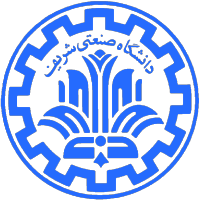

<font color=0F5298 size=7>
Machine Learning <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Fall 2025 <br>
<font color=3C99D size=5>
    Clustering: K-Means Clustering<br>
<font color=696880 size=4>
    Prepared by Benyamin Ghanbari <br>

<font color=696880 size=2>
    Curated by Alireza Mirshafieian

____

# Student Information

In [31]:
student_number = '402110876'
full_name = 'alireza sarbaz'

### Image Segmentation Using K-Means Clustering for Color-Based Region Extraction

### Description: 

In this project, you will implement **K-Means clustering from scratch** and use it to perform image segmentation based on color similarity. **Image segmentation** is the process of dividing an image into meaningful regions. In this assignment, segmentation is done using **color clustering**, where every pixel is grouped into one of K color clusters.

**⚠️ Notice:** You are allowed to use **only the imported libraries** and must **follow the provided function structure**.



# 📝 **Project Instructions**

1. **Load the image**  
   Load the input image and convert it into an **RGB numerical array**.

2. **Reshape image to pixels**  
   Flatten the image into a **2D array**, where each row represents one pixel (**R, G, B**).

3. **Initialize K cluster centers**  
   Randomly select **K pixels** to serve as the starting cluster centers.

4. **Assign pixels to nearest cluster**  
   Compute **distances** and assign each pixel to the **closest cluster center**.

5. **Update cluster centers**  
   Recalculate each center as the **mean color** of all pixels assigned to that cluster.

6. **K-Means algorithm**  
   Repeat **assignment** and **update steps** until **convergence** or **max iterations**.

7. **Reconstruct segmented image**  
   Replace each pixel with the **color of its assigned cluster center**.

8. **Using the Elbow Method**  
   Compute the Compute Within-Cluster Sum of Squares **WCSS** for various **K values** to help estimate an **optimal K**.

9. **Run the segmentation**  
   Apply your **full K-Means pipeline** to segment the chosen image.

10. **Display results**  
    Plot and **visualize** the original and segmented images **side-by-side**.


# 📤 **Expected Output**

- A **segmented image** produced by your **K-Means implementation**  
- A **plot showing the Elbow Method curve** (**WCSS vs. K**)  
- **Observe** how changing **K** affects segmentation


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:

# Step 1: Load the image

def load_image(path):
    img = Image.open(path)
    # Convert to RGB
    img = img.convert('RGB')
    # Convert PIL image to numpy array
    data = np.array(img)
    return data


# Step 2: Reshape image to pixels

def preprocess_image(image_data):
    """
    Reshape image from 3D array (height, width, 3) to 2D array (num_pixels, 3).
    Each row represents one pixel with its RGB values.
    
    Args:
        image_data: numpy array of shape (height, width, 3)
        
    Returns:
        pixels: numpy array of shape (height * width, 3)
    """
    height, width, channels = image_data.shape
    # Reshape to (height * width, 3) - flatten spatial dimensions
    pixels = image_data.reshape(height * width, channels)
    return pixels



In [5]:

# Step 3: Initialize K cluster centers

def initialize_centers(pixels, k):
    num_pixels = pixels.shape[0]
    # Randomly select k indices
    random_indices = np.random.choice(num_pixels, size=k, replace=False)
    # Select the corresponding pixels as centers
    centers = pixels[random_indices].astype(np.float64)
    return centers


# Step 4: Assign pixels to nearest cluster

def assign_clusters(pixels, centers):
    num_pixels = pixels.shape[0]
    k = centers.shape[0]
    
    # Calculate distances from each pixel to each center
    distances = np.zeros((num_pixels, k))
    
    for i in range(k):
        diff = pixels - centers[i]
        distances[:, i] = np.sqrt(np.sum(diff ** 2, axis=1))
    
    # Assign to nearest cluster
    labels = np.argmin(distances, axis=1)
    return labels


# Step 5: Update cluster centers
    
def update_centers(pixels, labels, k):
    new_centers = []
    
    for i in range(k):
        # Find all pixels assigned to cluster i
        cluster_pixels = pixels[labels == i]
        
        if len(cluster_pixels) > 0:
            # Calculate mean of cluster pixels
            new_center = np.mean(cluster_pixels, axis=0)
        else:
            # If cluster is empty, keep the previous center or use a random pixel
            # For simplicity, we'll use a random pixel from the dataset
            new_center = pixels[np.random.choice(len(pixels))]
        
        new_centers.append(new_center)
    
    return np.array(new_centers)



# Step 6: K-Means algorithm

def kmeans(pixels, k, max_iters=10, tol=1e-4):
    # Initialize centers randomly
    centers = initialize_centers(pixels, k)
    
    for iteration in range(max_iters):
        # Assign pixels to nearest clusters
        labels = assign_clusters(pixels, centers)
        
        # Update cluster centers
        new_centers = update_centers(pixels, labels, k)
        
        # Check for convergence: if centers haven't changed much, stop
        center_shift = np.sqrt(np.sum((new_centers - centers) ** 2))
         
        if center_shift < tol:
            break
            
        centers = new_centers
            
    return centers, labels
    

In [6]:

# Step 7: Reconstruct segmented image

def recreate_image(labels, centers, image_shape):
    # Replace each pixel with its cluster center color
    segmented_pixels = centers[labels]
    # Reshape back to original image shape
    segmented = segmented_pixels.reshape(image_shape).astype(np.uint8)
    return segmented

In [7]:
# Step 8: Elbow Method

def calculate_wcss(pixels, max_k=10):
    wcss = []
    
    for k in range(1, max_k + 1):
        centers, labels = kmeans(pixels, k, max_iters=10)
        
        # Calculate WCSS
        total_wcss = 0
        for i in range(k):
            cluster_pixels = pixels[labels == i]
            if len(cluster_pixels) > 0:
                diff = cluster_pixels - centers[i]
                cluster_wcss = np.sum(diff ** 2)
                total_wcss += cluster_wcss
            
        wcss.append(total_wcss)
        print(f"K={k}, WCSS={total_wcss:.2e}")
    
    return wcss

def plot_elbow(wcss):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(wcss) + 1), wcss, 'bo-', linewidth=2, markersize=8)
    plt.xlabel('Number of Clusters (K)', fontsize=12)
    plt.ylabel('WCSS', fontsize=12)
    plt.title('Elbow Method For Optimal K', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.xticks(range(1, len(wcss) + 1))
    plt.tight_layout()
    plt.show()

K=1, WCSS=3.24e+09
K=2, WCSS=1.05e+09
K=3, WCSS=8.01e+08
K=4, WCSS=5.99e+08
K=5, WCSS=4.16e+08
K=6, WCSS=3.73e+08
K=7, WCSS=2.83e+08
K=8, WCSS=2.78e+08
K=9, WCSS=2.28e+08
K=10, WCSS=2.19e+08


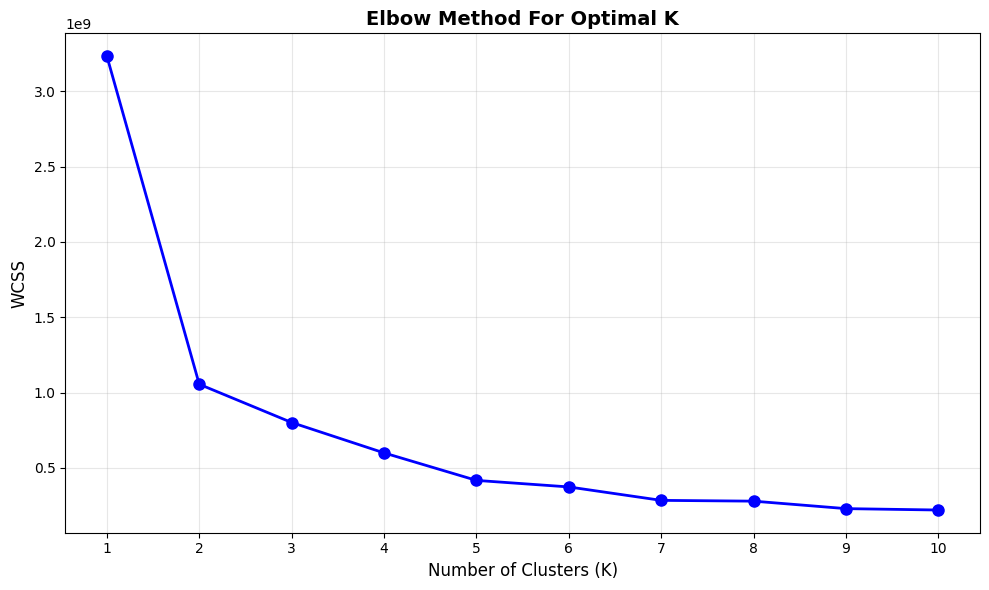

In [8]:
# Load image for Elbow Method (if not already loaded)
image_path_elbow = 'matryoshka.jpg'
original_image_elbow = load_image(image_path_elbow)
pixels_elbow = preprocess_image(original_image_elbow)

# Calculate WCSS for different K values
wcss = calculate_wcss(pixels_elbow, max_k=10)

# Plot the Elbow curve
plot_elbow(wcss)


In [9]:
# Step 9: Run the segmentation

# Load the image
image_path = 'matryoshka.jpg' 
original_image = load_image(image_path)

# Preprocess: reshape to pixels
pixels = preprocess_image(original_image)
image_shape = original_image.shape

# Choose number of clusters 
k = 5

# Run K-Means clustering
print(f"Running K-Means with K={k}...")
centers, labels = kmeans(pixels, k, max_iters=20, tol=1e-4)

# Reconstruct the segmented image
segmented_image = recreate_image(labels, centers, image_shape)

print("Segmentation completed!")


Running K-Means with K=5...
Segmentation completed!


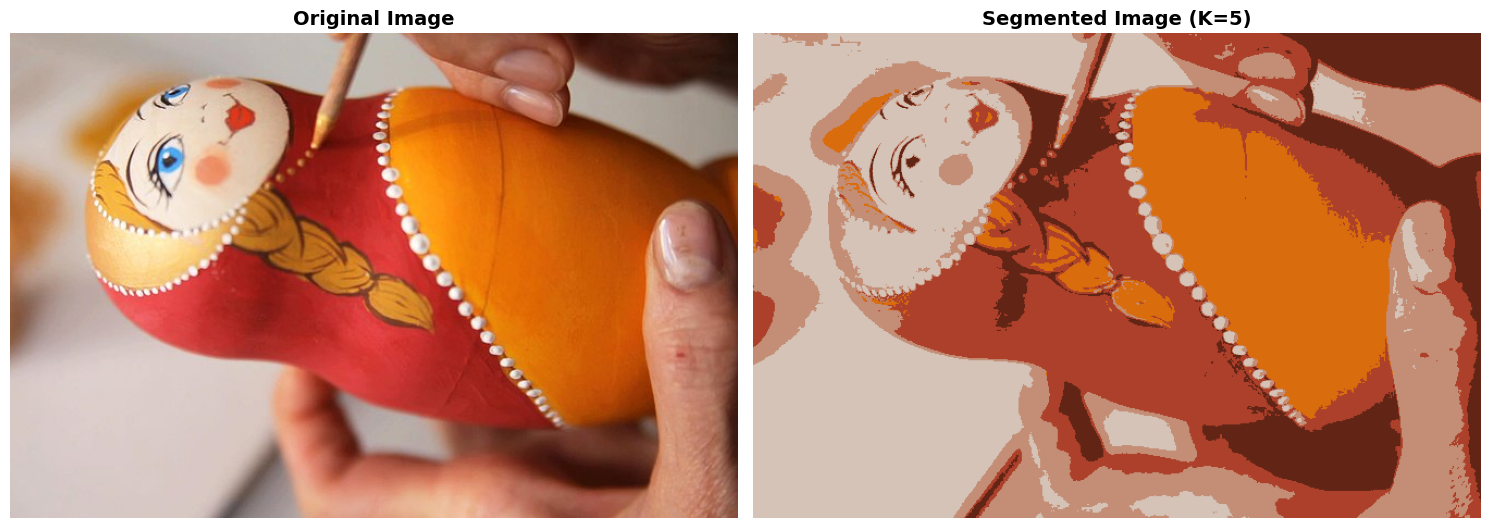

In [10]:
# Step 10: Display results

# Display original and segmented images side by side
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image', fontsize=14, fontweight='bold')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title(f'Segmented Image (K={k})', fontsize=14, fontweight='bold')
plt.axis('off')

plt.tight_layout()
plt.show()